<a href="https://colab.research.google.com/github/leesa9596/practice/blob/main/deeplearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
from tensorflow.keras.datasets import fashion_mnist

In [126]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()

In [127]:
x.shape

(60000, 28, 28)

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [128]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9 == Ankle boot


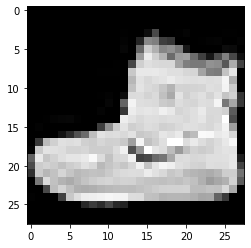

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline 

index = 0 
print(str(y[index]) + ' == ' + str(class_names[y[index]]))
img = x[index]
plt.imshow(img, cmap='gray')

---------

In [130]:
from tensorflow.keras.utils import to_categorical

In [131]:
x = x.astype('float32') 
x_test = x_test.astype('float32')

x /= 255
x_test /= 255

y = to_categorical(y)
y_test = to_categorical(y_test)


In [132]:
import numpy as np

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten

In [134]:
def basic_model():
    model = Sequential()
 
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  
    return model


In [135]:
model_basic = basic_model()


In [136]:
model_basic.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_basic.fit(x,y, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5001 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3766 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8905


In [138]:
test_loss, test_acc = model_basic.evaluate(x_test, y_test, verbose=2)
predictions = model_basic.predict(x_test)


313/313 - 0s - loss: 0.3461 - accuracy: 0.8774


In [139]:
predictions.shape

(10000, 10)

In [140]:
predictions[0]


array([4.07987528e-07, 1.92719354e-10, 1.27073125e-08, 3.99472189e-09,
       2.47606948e-08, 8.82035121e-03, 1.02384035e-06, 1.69231504e-01,
       3.46654670e-05, 8.21911991e-01], dtype=float32)

In [141]:
np.argmax(predictions[0])


9